# <u> Credit Card Behaviour Score Prediction Using  <u>
# <u>  Classification and Risk-Based Techniques <u>

In [1]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.5 MB/s eta 0:00:00


In [2]:
pip install shap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
from sklearn.pipeline import make_pipeline
import io

from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint, uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import optuna
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import joblib
import shap

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif

In [4]:
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train_dataset_final1.csv to train_dataset_final1.csv


In [95]:
train_df = pd.read_csv('train_dataset_final1.csv')

In [96]:
display(HTML("<hr>"))

## <u>Data Overview and initial cleaning<u>

In [97]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [98]:
train_df.shape

(25247, 27)

In [99]:
train_df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [101]:
# Checking Missing values

missing=train_df.isnull().sum()
missing[missing>0].sort_values(ascending=False)

,0
age,126


In [102]:
# Checking Duplicate values

train_df.duplicated().sum()

np.int64(0)

In [103]:
# Checking value count of each column

col=train_df[['marriage','sex','education','age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']]

In [104]:
for column in col.columns:
    print(f"\nColumn: {column}")
    print(col[column].value_counts(dropna=False))


Column: marriage
marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64

Column: sex
sex
1    15252
0     9995
Name: count, dtype: int64

Column: education
education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64

Column: age
age
29.0    1353
27.0    1258
28.0    1188
30.0    1162
26.0    1049
31.0    1027
34.0     979
33.0     976
25.0     976
35.0     951
24.0     948
32.0     946
36.0     944
37.0     876
39.0     806
38.0     800
23.0     774
40.0     741
41.0     695
42.0     659
44.0     566
43.0     561
45.0     513
46.0     491
22.0     468
47.0     404
48.0     382
49.0     358
50.0     333
51.0     290
53.0     262
52.0     247
54.0     206
55.0     171
56.0     148
NaN      126
57.0     104
58.0      96
59.0      80
60.0      58
21.0      58
61.0      44
62.0      37
63.0      24
66.0      21
64.0      21
65.0      20
67.0      13
69.0      12
70.0       9
68.0       5
72.0       3
71.0       2


In [105]:
display(HTML("<hr>"))

## <u>EDA<u>

In [106]:
# Handling missing values in age column

train_df['age'] = train_df.groupby(['education', 'sex'])['age'].transform(
lambda x: x.fillna(x.median()))

In [107]:
train_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [108]:
# handling invalid data in marriage column

train_df['marriage'] = train_df['marriage'].replace(0, 3)

train_df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,326


In [109]:
# handling invalid data in education column

train_df['education'] = train_df['education'].replace({0: 4, 5: 4, 6: 4})

train_df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


In [110]:
display(HTML("<hr>"))

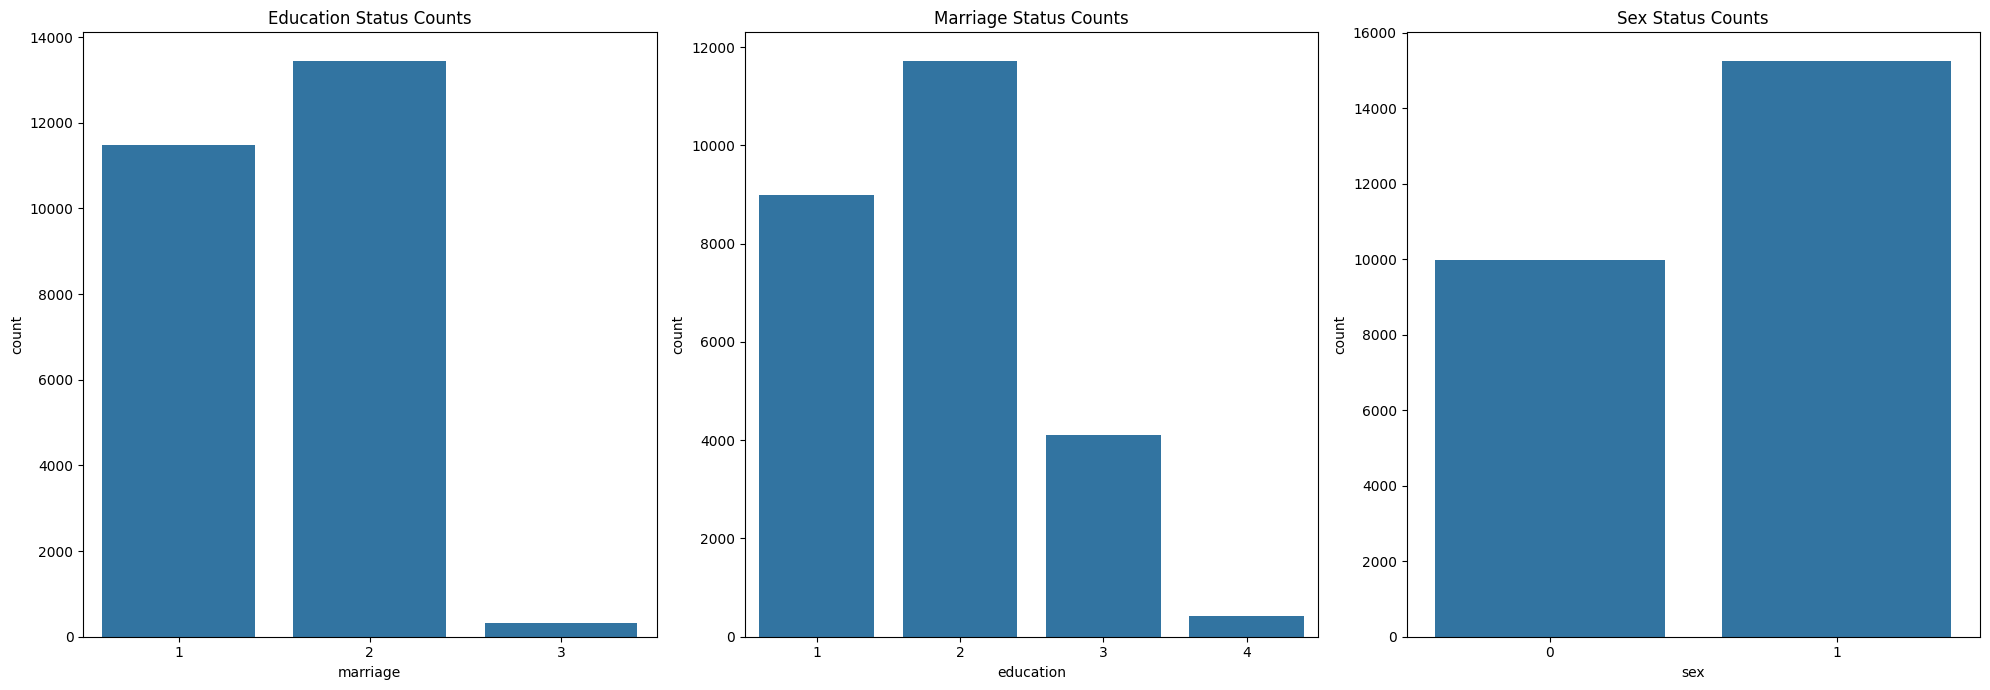

In [111]:
# Plotting colunt of categoriacl columns (marriage , eduaction, sex)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Education
sns.countplot(x='marriage', data=train_df, ax=axes[0])
axes[0].set_title('Education Status Counts')

# Marriage
sns.countplot(x='education', data=train_df, ax=axes[1])
axes[1].set_title('Marriage Status Counts')

# Sex
sns.countplot(x='sex', data=train_df, ax=axes[2])
axes[2].set_title('Sex Status Counts')

plt.tight_layout()
plt.show()

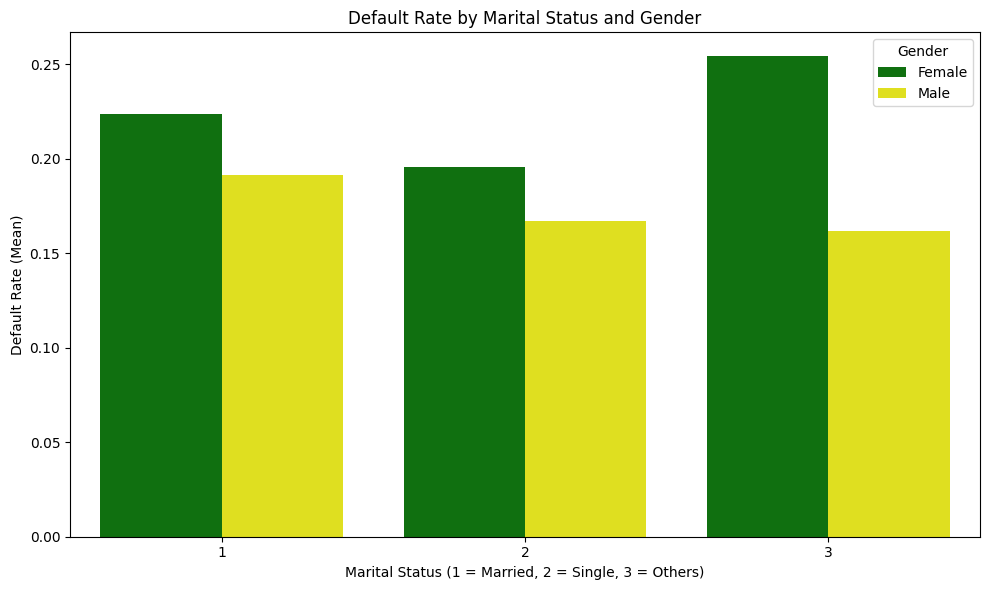

In [112]:
# Bar plot of default rate by marital status and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='marriage', y='next_month_default', hue='sex', data=train_df, ci=None, palette=['green', 'yellow'])
plt.title("Default Rate by Marital Status and Gender")
plt.xlabel("Marital Status (1 = Married, 2 = Single, 3 = Others)")
plt.ylabel("Default Rate (Mean)")
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

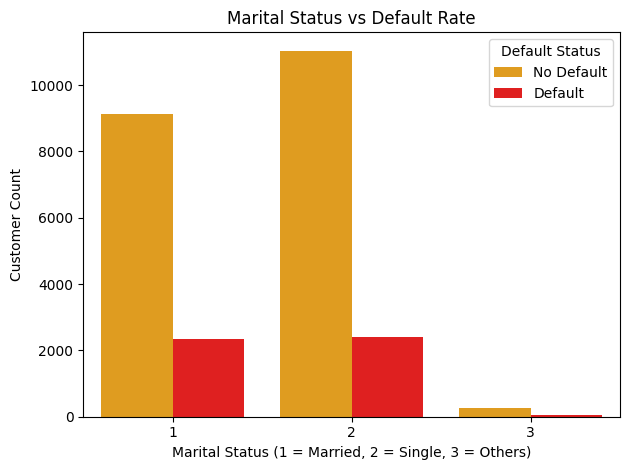

In [113]:
sns.countplot(x='marriage', hue='next_month_default', data=train_df,
              palette={0: 'orange', 1: 'red'})  # Soft blue and pink
plt.title("Marital Status vs Default Rate")
plt.xlabel("Marital Status (1 = Married, 2 = Single, 3 = Others)")
plt.ylabel("Customer Count")
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

Married and singlr individuals represnt the vast majority of both non defaulters and defaulters , so we primarily need to focus on these two groups (than group 3), both grouos have alomost same number of defaulters.x

In [114]:
display(HTML("<hr>"))

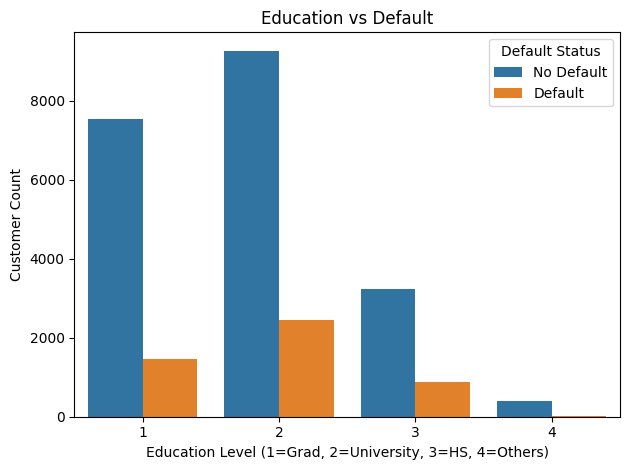

In [115]:
# Default rate by education

sns.countplot(x='education', hue='next_month_default', data=train_df)
plt.title("Education vs Default")
plt.xlabel("Education Level (1=Grad, 2=University, 3=HS, 4=Others)")
plt.ylabel("Customer Count")
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

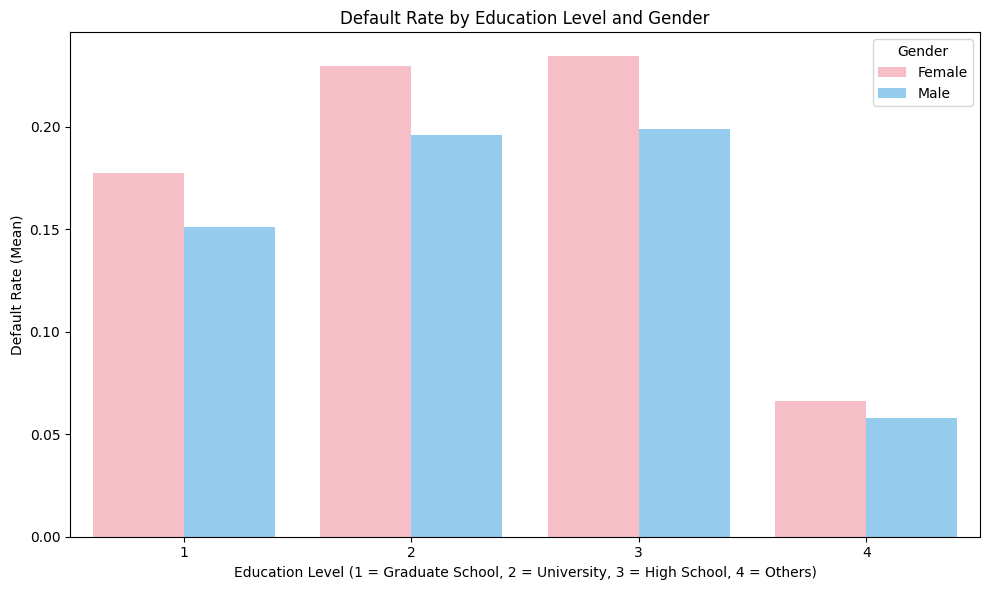

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='next_month_default', hue='sex', data=train_df, ci=None,
            palette=['#FFB6C1', '#87CEFA', '#D3D3D3'])  # Pink, Blue, Grey
plt.title("Default Rate by Education Level and Gender")
plt.xlabel("Education Level (1 = Graduate School, 2 = University, 3 = High School, 4 = Others)")
plt.ylabel("Default Rate (Mean)")
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

From above graph we can infer that University has more number of defalut then Grad followed by high school and others.

In [117]:
display(HTML("<hr>"))

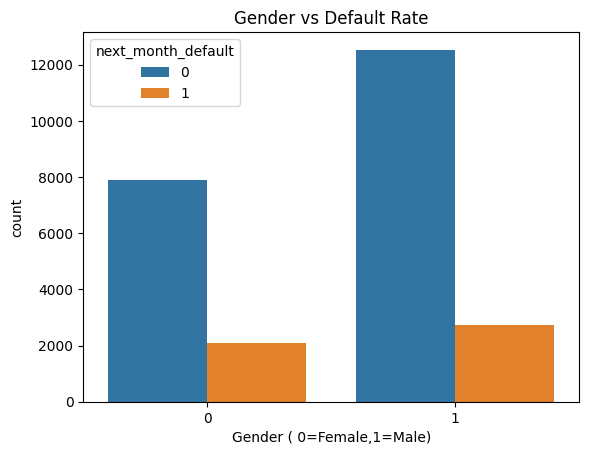

In [118]:
# Default rate by gender

sns.countplot(x='sex', hue='next_month_default', data=train_df)
plt.title("Gender vs Default Rate")
plt.xlabel("Gender ( 0=Female,1=Male)")
plt.show()

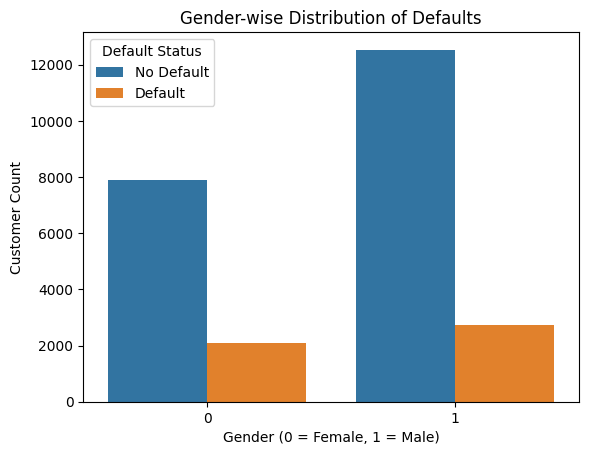

In [119]:
# Gender vs Default Status Countplot
sns.countplot(x='sex', hue='next_month_default', data=train_df)
plt.title("Gender-wise Distribution of Defaults")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Customer Count")
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.show()

Males have relatively higher default rate (a very little difference).While both genders show larger non -defaluter nature.

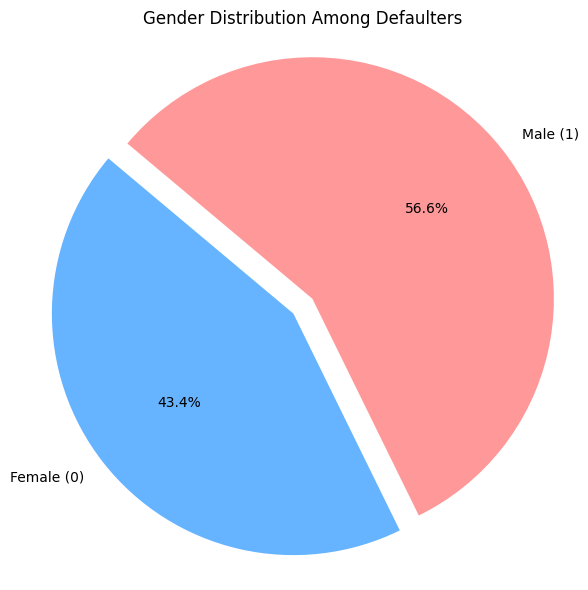

In [120]:
import matplotlib.pyplot as plt

# Filter the defaulters
defaulters = train_df[train_df['next_month_default'] == 1]

# Count of males and females among defaulters
gender_counts = defaulters['sex'].value_counts().sort_index()
labels = ['Female (0)', 'Male (1)']
colors = ['#66b3ff', '#ff9999']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=(0.05, 0.05))
plt.title('Gender Distribution Among Defaulters')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

In [121]:
display(HTML("<hr>"))

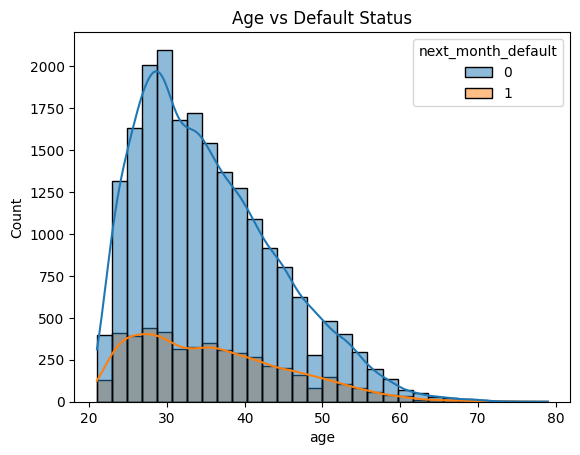

In [122]:
sns.histplot(data=train_df, x='age', hue='next_month_default', kde=True, bins=30)
plt.title("Age vs Default Status")
plt.show()

People with the age between 22 to 32 has the highest default rate , also peolpe between 32 to 38 has again shown a peak.                                                                                  
Also this distribution looks somewhat like a bell curve , but is slightly right skeewed, so there are few individuals in range 60-80,which can be consisdered as outliers.                             
So binning can be beneficial.

In [123]:
# Performing Binning

bins = [0, 25, 35, 50, 65, np.inf]
labels = ['<25', '25-35', '35-50', '50-65', '65+']
train_df['age_group'] = pd.cut(train_df['age'], bins=bins, labels=labels)

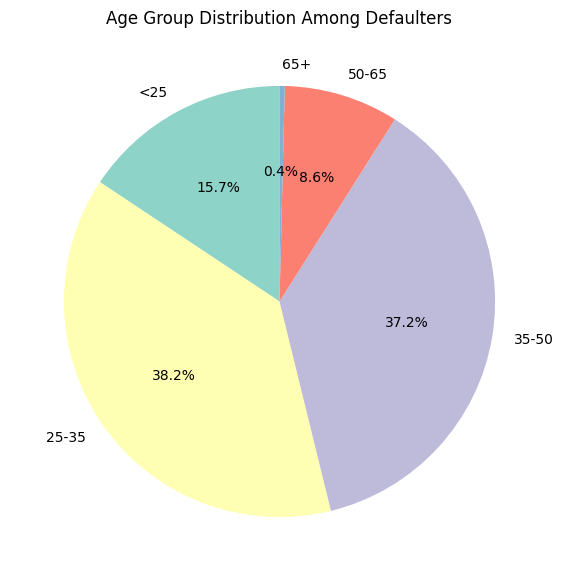

In [124]:
defaulters_age_dist = train_df[train_df['next_month_default'] == 1]['age_group'].value_counts().sort_index()

defaulters_age_dist.plot.pie(autopct='%1.1f%%', startangle=90,
                              figsize=(7,7), colors=sns.color_palette("Set3"))
plt.title("Age Group Distribution Among Defaulters")
plt.ylabel("")
plt.show()

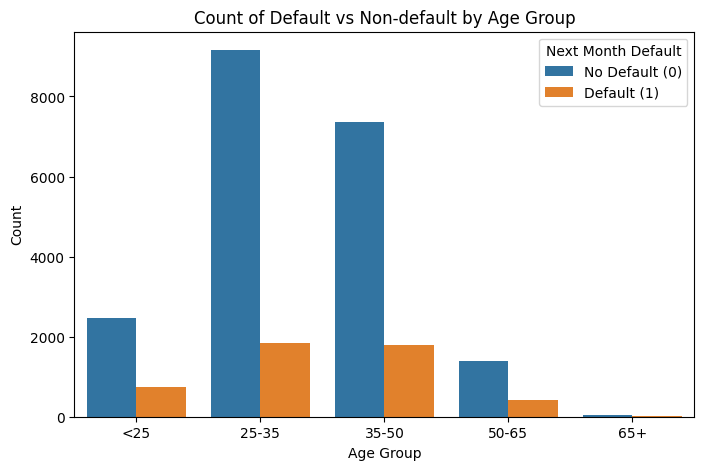

In [125]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x='age_group', hue='next_month_default')
plt.title("Count of Default vs Non-default by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Next Month Default', labels=['No Default (0)', 'Default (1)'])
plt.show()

Groups (25-35) and (35-50) have high defalut rate , compared to other groups

In [126]:
display(HTML("<hr>"))

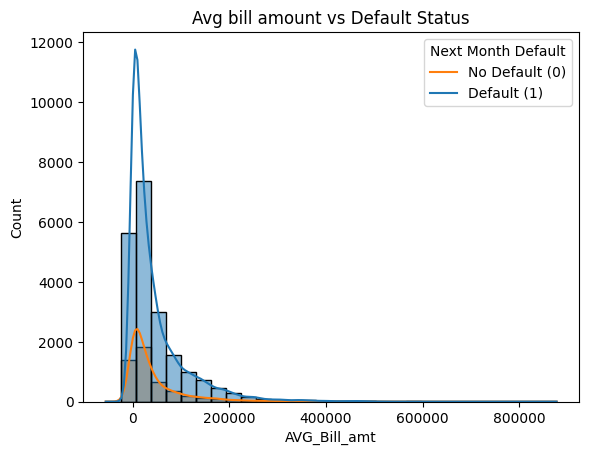

In [127]:
# Average Bill Distribution

sns.histplot(data=train_df, x='AVG_Bill_amt', hue='next_month_default', kde=True, bins=30)
plt.title("Avg bill amount vs Default Status")
plt.legend(title='Next Month Default', labels=['No Default (0)', 'Default (1)'])
plt.show()

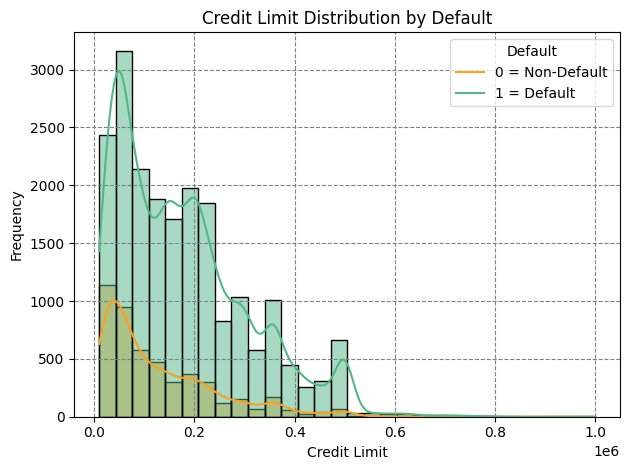

In [128]:
# Credit Limit Distribution

ax = sns.histplot(data=train_df, x='LIMIT_BAL', hue='next_month_default',
                 kde=True, bins=30, palette=['#52b788', '#ff9f1c'])

ax.legend(title='Default',labels=['0 = Non-Default', '1 = Default'])
ax.set_title("Credit Limit Distribution by Default")
ax.set_xlabel("Credit Limit")
ax.set_ylabel("Frequency")

ax.grid(axis='y', color='grey', linestyle='--')
ax.grid(axis='x', color='grey', linestyle='--')

plt.tight_layout()
plt.show()

A large majority of both defaulters and non-defaulters , have lower cerdit limit, primarilt below 2,00,000.
Graph is right skewed meaning , most of the accounts have lower credit limits.

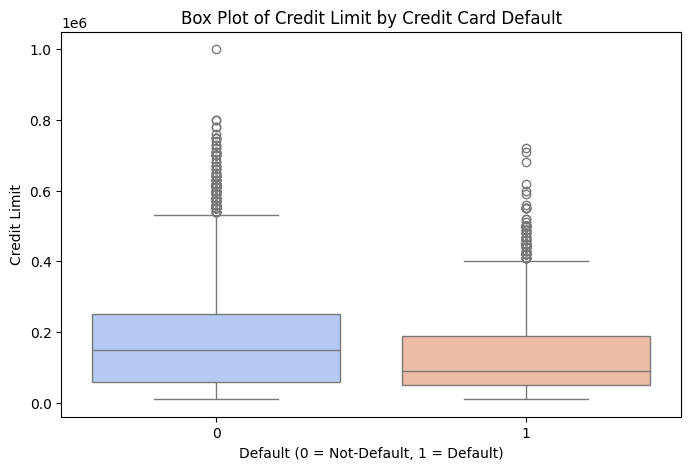

In [129]:
# Boxplot of Credit Limit (LIMIT_BAL)

plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=train_df, palette='coolwarm')
plt.title('Box Plot of Credit Limit by Credit Card Default')
plt.xlabel("Default (0 = Not-Default, 1 = Default)")
plt.ylabel('Credit Limit')
#pl.legend(labels=)
plt.show()

The higher number of defaulters occur at lower credit limits.  Also the median credit limit for non-defaulters is considerably higher than defaulters , indicating that customer with smaller credit limits are more likely to default.

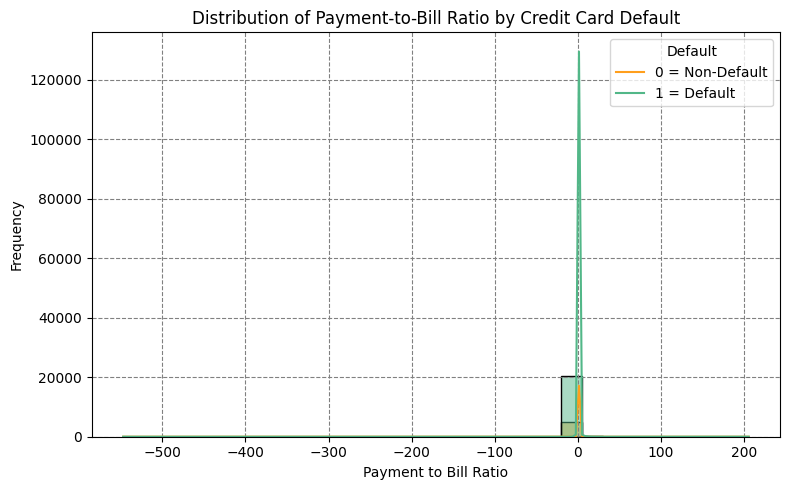

In [130]:
# Pay -to-Bill ratio (PAY_TO_BILL_ratio)

plt.figure(figsize=(8, 5))
ax = sns.histplot(data=train_df, x='PAY_TO_BILL_ratio', hue='next_month_default',
                 kde=True, bins=30, palette=['#52b788', '#ff9f1c'])

ax.legend(title='Default',labels=['0 = Non-Default', '1 = Default'])

ax.set_title("Distribution of Payment-to-Bill Ratio by Credit Card Default")
ax.set_xlabel("Payment to Bill Ratio")
ax.set_ylabel("Frequency")

ax.grid(axis='y', color='grey', linestyle='--')
ax.grid(axis='x', color='grey', linestyle='--')

plt.tight_layout()
plt.show()

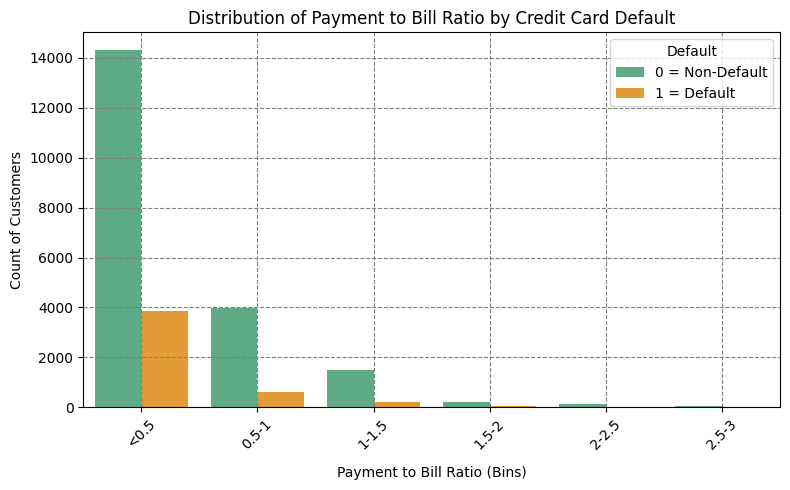

In [131]:
# Define custom bin edges
bin_edges = [-0,0.5,1, 1.5, 2, 2.5, 3]

# Create custom bin labels
bin_labels = ['<0.5','0.5-1','1-1.5', '1.5-2', '2-2.5', '2.5-3']

# Bin pay_to_bill_ratio into custom intervals
train_df['pay_to_bill_ratio_bin'] = pd.cut(train_df['PAY_TO_BILL_ratio'],
                                         bins=bin_edges,
                                         labels=bin_labels,
                                         include_lowest=True)

# Plot count of non-default and default per bin
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='pay_to_bill_ratio_bin',
                   hue='next_month_default',
                   data=train_df,
                   palette=['#52b788', '#ff9f1c'])

ax.legend(title='Default',
          labels=['0 = Non-Default', '1 = Default'])

ax.set_title("Distribution of Payment to Bill Ratio by Credit Card Default")
ax.set_xlabel("Payment to Bill Ratio (Bins)", labelpad=10)
ax.set_ylabel("Count of Customers")

ax.grid(axis='y', color='grey', linestyle='--')
ax.grid(axis='x', color='grey', linestyle='--')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [132]:
pay_cols = [f'pay_{i}' for i in range(0, 7) if i!= 1]
train_df[pay_cols].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680
std,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000


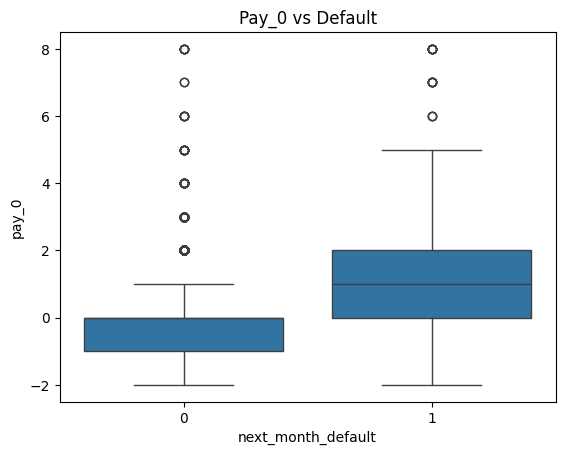

In [133]:
# Let's plot Pay_0 vs default
sns.boxplot(x='next_month_default', y='pay_0', data=train_df)
plt.title("Pay_0 vs Default")
plt.show()

We can infer that higher value of pay_0 are associated with a much higher propensity to default.

## New Engineered Features

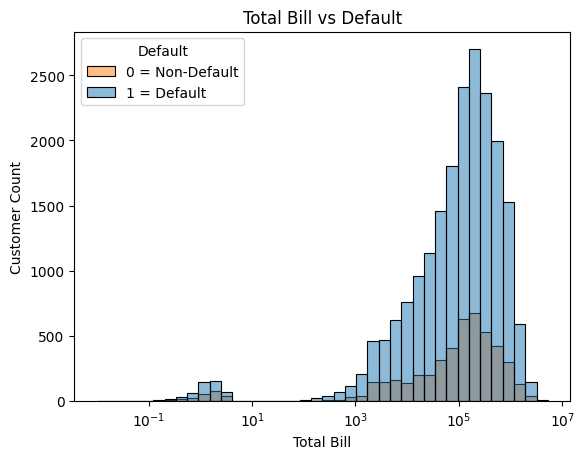

In [134]:
# Totla bill

train_df['total_bill'] = train_df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1)

sns.histplot(data=train_df, x='total_bill', hue='next_month_default', bins=40, log_scale=True)
plt.title("Total Bill vs Default")
plt.xlabel("Total Bill")
plt.ylabel('Customer Count')
plt.legend(title='Default',labels=['0 = Non-Default', '1 = Default'])
plt.show()

Most customers have total bill between 10^2 and 10^6. People with total bill in range 10^4 to 10^6 have relatively higher default rate.

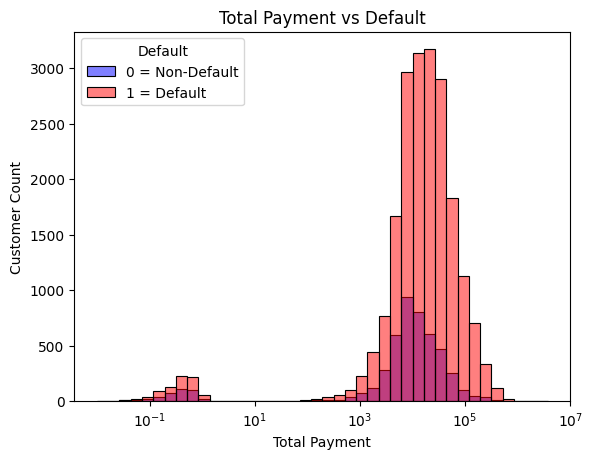

In [135]:
# Total payment
train_df['total_payment'] = train_df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)

# Plotting with custom colors
sns.histplot(data=train_df, x='total_payment', hue='next_month_default',
             bins=40, log_scale=True,
             palette=['red', 'blue'])

plt.title("Total Payment vs Default")
plt.xlabel("Total Payment")
plt.ylabel("Customer Count")
plt.legend(title='Default',labels=['0 = Non-Default', '1 = Default'])

plt.show()

In range 10^3 to 10^5 , have relatively higher number of default rate.

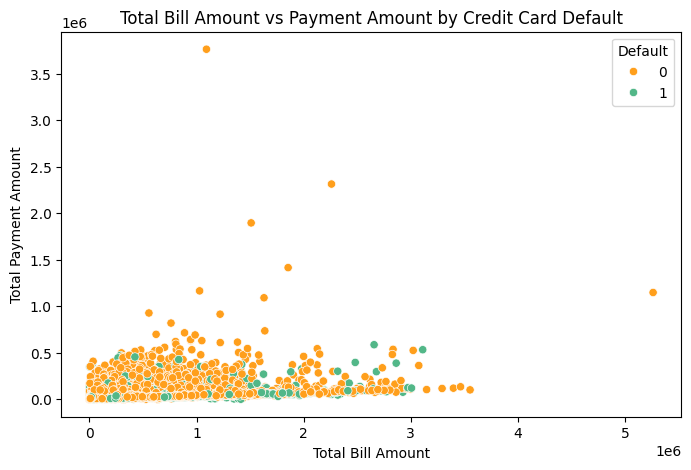

In [136]:
# Scatter Plot: Payment Amount vs Bill Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='total_bill', y='total_payment',
                hue='next_month_default', palette=['#ff9f1c', '#52b788'])

plt.title("Total Bill Amount vs Payment Amount by Credit Card Default")
plt.xlabel("Total Bill Amount")
plt.ylabel("Total Payment Amount")
plt.legend(title='Default')
plt.show()

Majority of data points are highly concentrated in the lower left corner of trh graph, where total bill is approximately equal to total payment  (i.e. customers are almost paying their bills in full) .                                                                                                    
However there are few point where toyal bill is clearly higher than total payment , suggesting partial payments or outstanding payments.

In [137]:
display(HTML("<hr>"))

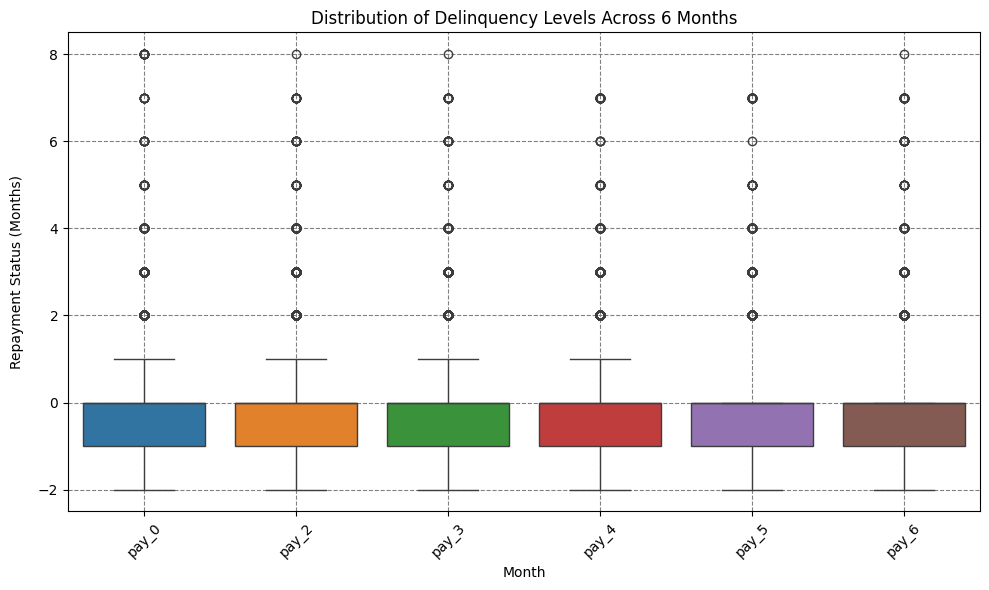

In [138]:
# Analysing Delinquency Trends (Repayment status for each of the 6 months)
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=train_df[pay_cols])

ax.set_title("Distribution of Delinquency Levels Across 6 Months")
ax.set_xlabel("Month")
ax.set_ylabel("Repayment Status (Months)", labelpad=10)

ax.grid(axis='y', color='grey', linestyle='--')
ax.grid(axis='x', color='grey', linestyle='--')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The median and IQR range is around 0 for all, the vast majority of customers punctually made payments on time.Still consistent number of outliers are present across all months , with maximim up to 8 months.                                                                         Higher values (of circles) indicates more months of delayed payments.

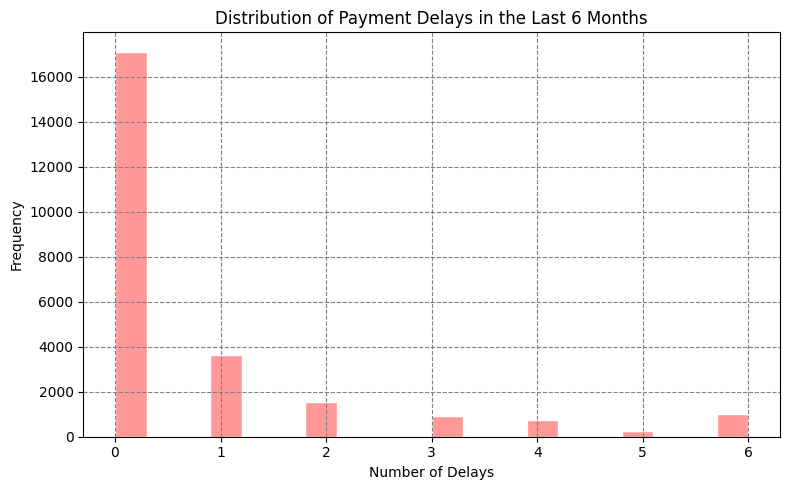

In [139]:
# Calculate number of delays per customer in last 6 months
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
train_df['delinquency_count_6m'] = train_df[pay_cols].apply(lambda row: (row >= 1).astype(int).sum(), axis=1)

# Plotting the colorful histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(train_df['delinquency_count_6m'],
                 bins=20,
                 kde=False,
                 color='#ff7675',   # a nice coral-red color
                 edgecolor='white') # adding a white border for contrast

ax.set_title("Distribution of Payment Delays in the Last 6 Months")
ax.set_xlabel("Number of Delays")
ax.set_ylabel("Frequency")

ax.grid(axis='y', color='grey', linestyle='--')
ax.grid(axis='x', color='grey', linestyle='--')

plt.tight_layout()
plt.show()

Highest concentration at 0 , indiactes , most customers paid on time suggesting low overall default risk.As the number of delays increases from 0 to 5 , the number of customers experiencing delays drops significamtly.Still around 1500 customers ,experienced 6 payment delays

In [140]:
display(HTML("<hr>"))

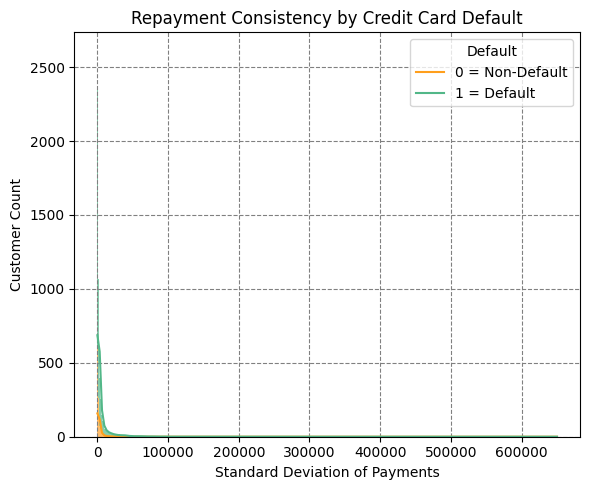

In [141]:
# Calculate standard deviation of payments to gauge consistency
train_df['std_pay_amt'] = train_df[[f'pay_amt{i}' for i in range(1, 7)]].std(axis=1)

# Plotting with hue to differentiate by default
plt.figure(figsize=(6, 5))
ax = sns.histplot(data=train_df,
                 x='std_pay_amt',
                 hue='next_month_default',
                 palette=['#52b788', '#ff9f1c'],  # greenish for non-default, orange for default
                 edgecolor='white',
                 kde=True,
                 multiple='stack',
                 alpha=0.7)

ax.legend(title='Default',
          labels=['0 = Non-Default', '1 = Default'])

ax.set_title("Repayment Consistency by Credit Card Default")
ax.set_xlabel("Standard Deviation of Payments")
ax.set_ylabel("Customer Count")

ax.grid(axis='y', color='grey', linestyle='--')
ax.grid(axis='x', color='grey', linestyle='--')

plt.tight_layout()
plt.show()

The distribution of repayment consistency(indiacted using standard deviations of payments made by credit card users over past 6 months),is highly right-skewed.Indicating that ,most customers have low standard deviation in their payments i.e. their payments are consistent month to month, indicating that they are likely to manage their credit responsibly.                                  
On the other hand some users have, extremely high standard deviation , indicating irregular or erratuic repayment behaviour.(have more chances of being default,even if they pay large amounts)      
----> From a financial risk perspective, customers with low payment variability are generally more reliable and pose less credit risk. Conversely, those with high variability may represent greater default risk due to erratic cash flow or repayment behavior.

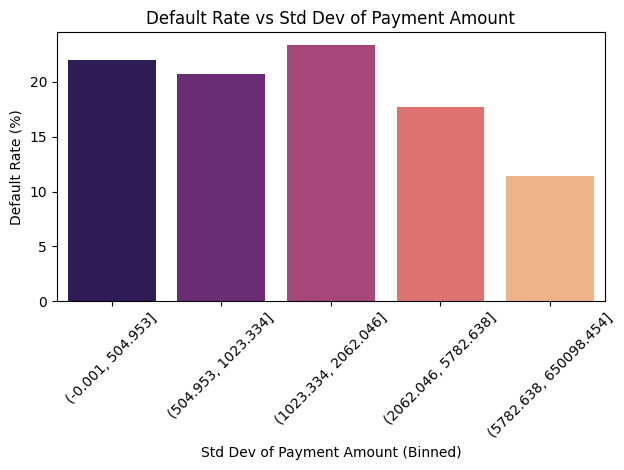

In [142]:
# Bin std_pay_amt into quantiles
train_df['std_pay_bin'] = pd.qcut(train_df['std_pay_amt'], q=5, duplicates='drop')

# Calculate default rate for each bin
std_pay_default = train_df.groupby('std_pay_bin')['next_month_default'].mean().reset_index()
std_pay_default['default_rate_percent'] = std_pay_default['next_month_default'] * 100

# Plot
sns.barplot(x='std_pay_bin', y='default_rate_percent', data=std_pay_default, palette='magma')
plt.title("Default Rate vs Std Dev of Payment Amount")
plt.xlabel("Std Dev of Payment Amount (Binned)")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The highest default rate is observed for customers with moderate standard deviation in their payment amounts (around 1023 to 2062).Also there is low risk at high variability.

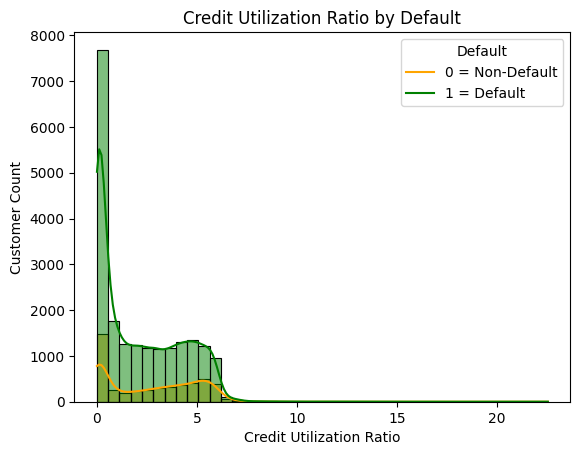

In [143]:
# Credit Utilization

train_df['total_bill'] = train_df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1)
train_df['credit_utilization_ratio'] = train_df['total_bill'] / train_df['LIMIT_BAL']

# Plotting with hue to show defaulters vs non-defaulters
sns.histplot(data=train_df, x='credit_utilization_ratio',
             hue='next_month_default',
             kde=True,
             palette=['green', 'orange'],  # purple for non-default, grey for default
             bins=40)

plt.title("Credit Utilization Ratio by Default")
plt.xlabel("Credit Utilization Ratio")
plt.ylabel("Customer Count")
plt.legend(title='Default',labels=['0 = Non-Default', '1 = Default'])

plt.show()

Most customers are using a small portion of their available credit limit,(as credit limit < 0)indicating conservative credit usage and potentially better credit discipline.
A moderate number of customers have higher credit utilization ratios, sometimes even exceeding 100% (ratio > 1),(generally between 1 to 6) which suggests they are spending more than their credit limit or maxing out their credit.                                                                          
High credit utilization is often linked with higher credit risk because customers may be over-leveraged or financially stressed.

As credit ratio increses , proportion of defaulting customer increases.

----> Customers with low credit utilization are generally less risky.

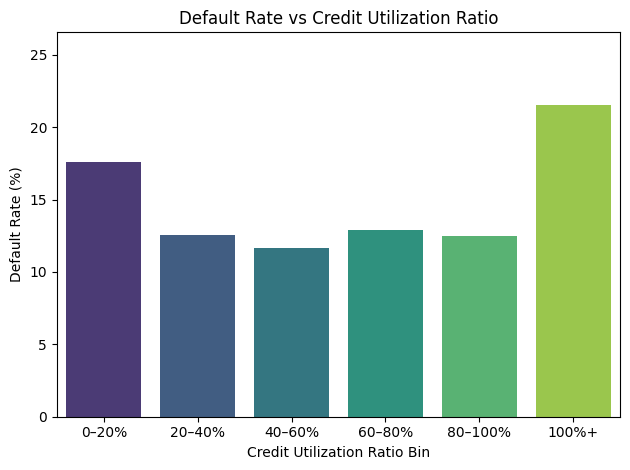

In [144]:
# Create bins for credit utilization ratio
train_df['util_bin'] = pd.cut(train_df['credit_utilization_ratio'],
                              bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0, float('inf')],
                              labels=['0–20%', '20–40%', '40–60%', '60–80%', '80–100%', '100%+'])

# Calculate default rate per bin
util_default = train_df.groupby('util_bin')['next_month_default'].mean().reset_index()
util_default['default_rate_percent'] = util_default['next_month_default'] * 100

# Plot default rate by utilization bin
sns.barplot(x='util_bin', y='default_rate_percent', data=util_default, palette='viridis')
plt.title("Default Rate vs Credit Utilization Ratio")
plt.xlabel("Credit Utilization Ratio Bin")
plt.ylabel("Default Rate (%)")
plt.ylim(0, util_default['default_rate_percent'].max() + 5)
plt.tight_layout()
plt.show()

The highest default rate (~23%) is observed in the '100%=' credit utlisatiion ratio bin indiacting that , customers who have exceeded theor credit limit are most likely to default.                                                             
The defalut rate is lower inthe mid ranges  (20 ~ 40 % and 40 ~ 60 %) around 12%

In [145]:
display(HTML("<hr>"))

In [146]:
display(HTML("<hr>"))

# <u>Understanding Target Variable<u>

In [147]:
train_df['next_month_default'].value_counts()

,count
next_month_default,
0,20440
1,4807


In [148]:
class_percentages = train_df['next_month_default'].value_counts(normalize=True) * 100
print("\nClass percentages:\n", class_percentages)


Class percentages:
 next_month_default
0    80.960114
1    19.039886
Name: proportion, dtype: float64


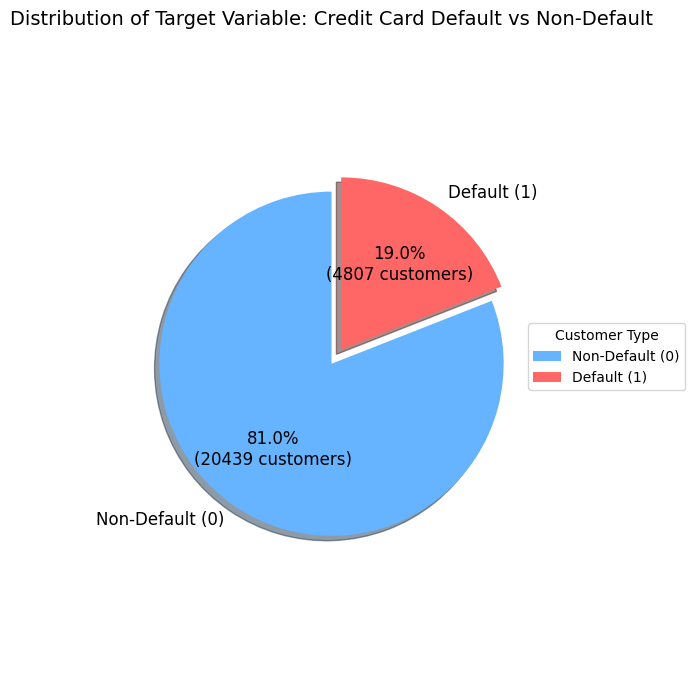

In [149]:
# Visua;ising through pie chart

target_counts = train_df['next_month_default'].value_counts().sort_index()
labels = ['Non-Default (0)', 'Default (1)']
sizes = target_counts.values
colors = ['#66b3ff', '#ff6666']  # blue = non-default, red = default
explode = (0, 0.1)  # highlight the Default slice

def autopct_format(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute} customers)"

plt.figure(figsize=(6, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, sizes),
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops=dict(color="black", fontsize=12)
)

plt.legend(wedges, labels, title="Customer Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribution of Target Variable: Credit Card Default vs Non-Default", fontsize=14)
plt.axis('equal')  # Ensures pie chart is circular
plt.tight_layout()
plt.show()


Since target column distribution is imbalanced , we will need to balance it.

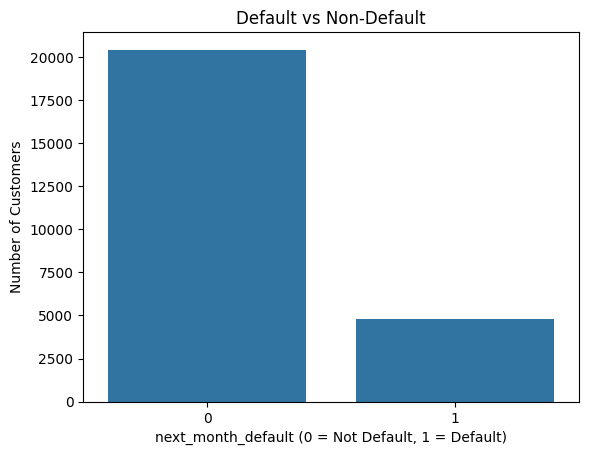

In [150]:
# Graphical representation

sns.countplot(x='next_month_default', data=train_df)
plt.title("Default vs Non-Default")
plt.xlabel("next_month_default (0 = Not Default, 1 = Default)")
plt.ylabel("Number of Customers")
plt.show()

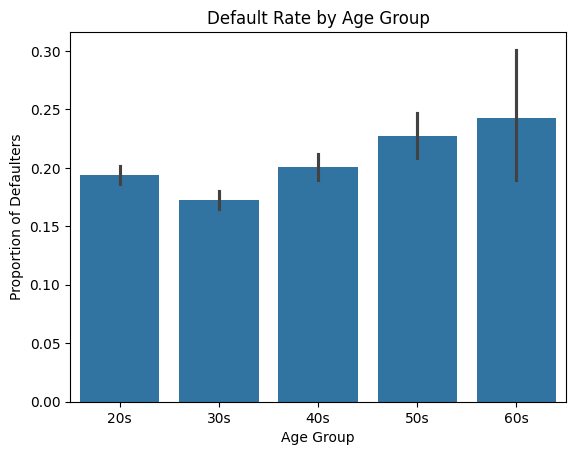

In [151]:
train_df['age_group'] = pd.cut(train_df['age'], bins=[20,30,40,50,60,70], labels=['20s','30s','40s','50s','60s'])
sns.barplot(x='age_group', y='next_month_default', data=train_df)
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Defaulters')
plt.show()

In [152]:
display(HTML("<hr>"))

# <u>Feature Engineering<u>

In [153]:
# 1)Total payment over last 6 months

train_df['total_payment'] = train_df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)

# 2)Total billed amount over last 6 months

train_df['total_bill'] = train_df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1)

# Both graph already plotted above

In [154]:
# 3)Credit Utilisation Ratio ----> Ratio of average bill amount to total credit limit.

train_df['credit_utilization_ratio'] = train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']

# Graph already plotted above

Tells how much of the available credit a customer has typically used.

In [155]:
#  4)Recent payment and bill pressure

train_df['recent_bill_change'] = train_df['Bill_amt1'] - train_df['Bill_amt6']
train_df['recent_payment_change'] = train_df['pay_amt1'] - train_df['pay_amt6']

In [156]:
#  5)Standard deviation of bill and payment amounts.

train_df['std_bill_amt'] = train_df[[f'Bill_amt{i}' for i in range(1, 7)]].std(axis=1)
train_df['std_pay_amt'] = train_df[[f'pay_amt{i}' for i in range(1, 7)]].std(axis=1) # indiactes payment consistency

In [157]:
#  6)Number of months (out of 6 months) where some billing activity happened (for individual customer)

train_df['active_months'] = train_df[[f'Bill_amt{i}' for i in range(1, 7)]].apply(lambda x: sum(x != 0), axis=1)

In [158]:
#  7)Counts how many months (out of 6 months) had no bill activity (for individual customer)

train_df['no_bill_months'] = train_df[[f'Bill_amt{i}' for i in range(1, 7)]].apply(lambda x: sum(x == 0), axis=1)

In [159]:
#  8)Number of months (from 6 months) where the customer had payment delays (status ≥ 1).

pay_cols =['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
train_df['delinquency_count_6m'] = train_df[pay_cols].apply(lambda row: (row >= 1).astype(int).sum(), axis=1)

# histplot plotted above

More delinquencies indicates higher default risk.

In [160]:
#  9) Repayment ratio for last month (payment / bill)

repayment_cols = [f'pay_amt{i}' for i in range(1, 7)]
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

train_df['repayment_ratio_6'] = train_df['pay_amt1'] / (train_df['Bill_amt6'] + 1)
train_df['avg_repayment_ratio_6m'] = train_df[repayment_cols].sum(axis=1) / (train_df[bill_cols].sum(axis=1) + 1)

In [161]:
# !0) Age group (binning already done)

In [162]:
display(HTML("<hr>"))

Plotting new features to check whether they need any feature transformation or not

new_features = [ 'recent_payment_change','recent_bill_change','std_bill_amt', 'delinquency_count_6m', 'repayment_ratio_6','avg_repayment_ratio_6m','active_months','no_bill_months']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(new_features):
    plt.subplot(2, 4, i+1)
    sns.histplot(train_df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

In [163]:
display(HTML("<hr>"))

## <u>Normalising Techniques<u>

In [164]:
# Transforming skewed features

skewed_features = ['AVG_Bill_amt', 'total_bill', 'std_pay_amt', 'credit_utilization_ratio', 'LIMIT_BAL', 'total_payment','recent_bill_change','std_bill_amt', 'delinquency_count_6m', 'repayment_ratio_6','avg_repayment_ratio_6m','active_months','no_bill_months','recent_payment_change']
for feature in skewed_features:

# Log transformation

   train_df[f'log_{feature}'] = np.log1p(train_df[feature])
   train_df[f'log_{feature}']

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [171]:
# Apply log transform directly to the specified columns
skewed_features = ['AVG_Bill_amt', 'total_bill', 'std_pay_amt',
                   'credit_utilization_ratio', 'LIMIT_BAL',
                   'total_payment', 'recent_bill_change',
                   'std_bill_amt', 'delinquency_count_6m',
                   'repayment_ratio_6', 'avg_repayment_ratio_6m',
                   'active_months', 'no_bill_months',
                   'recent_payment_change']

for feature in skewed_features:
    train_df[f'log_{feature}'] = np.log1p(train_df[feature])

# View the first few rows of the new columns
# List of new (log-transformed) columns
log_features = [f'log_{feature}' for feature in skewed_features]

# Calculate and show their skewness in the same format
print("Applying Log Transformation on skewed columns :-")
print()
print(train_df[log_features].skew())


Applying Log Transformation on skewed columns :-

log_AVG_Bill_amt                0.208182
log_total_bill                 -2.082920
log_std_pay_amt                -1.328216
log_credit_utilization_ratio   -2.102888
log_LIMIT_BAL                  -1.451200
log_total_payment              -1.634657
log_recent_bill_change         -1.145248
log_std_bill_amt               -1.439439
log_delinquency_count_6m        0.772743
log_repayment_ratio_6           0.634062
log_avg_repayment_ratio_6m     -0.397913
log_active_months               0.000000
log_no_bill_months              1.387198
log_recent_payment_change      -1.448278
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [172]:
# Yeo-Johnson transformation

cols_to_transform = ['AVG_Bill_amt', 'total_bill', 'std_pay_amt', 'credit_utilization_ratio',
                     'LIMIT_BAL', 'total_payment', 'recent_bill_change','recent_payment_change', 'std_bill_amt',
                     'delinquency_count_6m', 'repayment_ratio_6', 'avg_repayment_ratio_6m',
                     'active_months', 'no_bill_months']

pt = PowerTransformer(method='yeo-johnson')

train_df[cols_to_transform] = pt.fit_transform(train_df[cols_to_transform])

# Checking skewness after transform

print("Applying Yeo-Johnson Transformation on skewed columns :-")
print()
print(train_df[cols_to_transform].skew())


Applying Yeo-Johnson Transformation on skewed columns :-

AVG_Bill_amt               -5.761488
total_bill                  0.003810
std_pay_amt                -0.068834
credit_utilization_ratio    0.056474
LIMIT_BAL                   0.005060
total_payment              -0.019496
recent_bill_change         -0.551430
recent_payment_change      -0.024513
std_bill_amt               -0.032739
delinquency_count_6m        0.765736
repayment_ratio_6           0.530510
avg_repayment_ratio_6m      0.266105
active_months              -1.386636
no_bill_months              1.386443
dtype: float64


Coumns like repayment_ratio_6,active_months and no_bill_months still have mildly skewed but overall resultis bettrer than log transformation,so will continue with Yeo-Johnson transformation.

In [78]:
display(HTML("<hr>"))

## <u>Outlier Detection and Handling<u>

In [79]:
def detect_outliers_iqr(data, features):
    outliers = {}
    for col in features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_indices = data[(data[col] < lower) | (data[col] > upper)].index
        outliers[col] = outlier_indices
    return outliers

# Use the same cols_to_transform as features list
outliers_detected = detect_outliers_iqr(train_df, cols_to_transform)

# Print number of outliers per feature
print("Outliers count per transformed feature:")
for feature, indices in outliers_detected.items():
    print(f"{feature}: {len(indices)}")

Outliers count per transformed feature:
AVG_Bill_amt: 1608
total_bill: 10
std_pay_amt: 2376
credit_utilization_ratio: 0
LIMIT_BAL: 0
total_payment: 1880
recent_bill_change: 3158
recent_payment_change: 4869
std_bill_amt: 127
delinquency_count_6m: 0
repayment_ratio_6: 2570
avg_repayment_ratio_6m: 0
active_months: 5432
no_bill_months: 5432


Instead of deleting ouliers , I am capping them to reasonable limits to reduce their effects on model.

In [80]:
# Capping outliers at 1st and 99th percentile on transformed features

def cap_outliers(data, features):
    data_capped = data.copy()
    for col in features:
        lower = data[col].quantile(0.01)
        upper = data[col].quantile(0.99)
        data_capped[col] = np.where(data_capped[col] < lower, lower, data_capped[col])
        data_capped[col] = np.where(data_capped[col] > upper, upper, data_capped[col])
    return data_capped

train_df_capped = cap_outliers(train_df, cols_to_transform)


In [81]:
train_df_capped.shape   # Same as original dataset

(25247, 57)

In [82]:
display(HTML("<hr>"))

In [83]:
train_df_capped.columns.tolist()

['Customer_ID',
 'marriage',
 'sex',
 'education',
 'LIMIT_BAL',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'Bill_amt1',
 'Bill_amt2',
 'Bill_amt3',
 'Bill_amt4',
 'Bill_amt5',
 'Bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'AVG_Bill_amt',
 'PAY_TO_BILL_ratio',
 'next_month_default',
 'age_group',
 'pay_to_bill_ratio_bin',
 'total_bill',
 'total_payment',
 'delinquency_count_6m',
 'std_pay_amt',
 'std_pay_bin',
 'credit_utilization_ratio',
 'util_bin',
 'recent_bill_change',
 'recent_payment_change',
 'std_bill_amt',
 'active_months',
 'no_bill_months',
 'repayment_ratio_6',
 'avg_repayment_ratio_6m',
 'log_AVG_Bill_amt',
 'log_total_bill',
 'log_std_pay_amt',
 'log_credit_utilization_ratio',
 'log_LIMIT_BAL',
 'log_total_payment',
 'log_recent_bill_change',
 'log_std_bill_amt',
 'log_delinquency_count_6m',
 'log_repayment_ratio_6',
 'log_avg_repayment_ratio_6m',
 'log_active_months',
 'log_no_bill_months',
 'log_r

In [84]:
display(HTML("<hr>"))

## <u>Feature Selection<u>

### For numeric variables

Method 1 ---> Using correlation with target variable and stastical significance(p-values) of correlation

In [85]:
# Define features to consider for selection:
log_features = [
    'log_AVG_Bill_amt', 'log_total_bill', 'log_std_pay_amt', 'log_credit_utilization_ratio',
    'log_LIMIT_BAL', 'log_total_payment', 'log_recent_bill_change', 'log_recent_payment_change',
    'log_std_bill_amt', 'log_delinquency_count_6m', 'log_repayment_ratio_6', 'log_avg_repayment_ratio_6m',
    'log_active_months', 'log_no_bill_months'
]

aggregated_numeric_features = [
    'AVG_Bill_amt', 'total_bill', 'std_pay_amt', 'credit_utilization_ratio', 'LIMIT_BAL',
    'total_payment', 'recent_bill_change','age', 'recent_payment_change', 'std_bill_amt',
    'delinquency_count_6m', 'repayment_ratio_6', 'avg_repayment_ratio_6m', 'active_months', 'no_bill_months'
]

monthly_bill_features = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']

ratio_features = ['PAY_TO_BILL_ratio']

# Target variable
target = 'next_month_default'

# Combine all features for selection
features_for_selection =  aggregated_numeric_features + monthly_bill_features + ratio_features

X = train_df_capped[features_for_selection]
y = train_df_capped['next_month_default']

X.replace([np.inf, -np.inf], np.nan, inplace=True)

imputer = SimpleImputer(strategy='median')  # or 'mean', depending on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Remove any features not in dataframe columns (in case of mismatch)
features_for_selection = [f for f in features_for_selection if f in train_df_capped.columns]

<ipython-input-85-2405421037>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [86]:
X_imputed.isnull().sum().sum()

np.int64(0)

In [87]:
# Copy relevant data, replace inf with NaN
df_corr = train_df_capped[features_for_selection + [target]].replace([np.inf, -np.inf], np.nan)

# Impute NaNs in features
imputer = SimpleImputer(strategy='median')
df_corr[features_for_selection] = imputer.fit_transform(df_corr[features_for_selection])

# Drop rows with missing target (if any)
df_corr = df_corr.dropna(subset=[target])

results = []
for feature in features_for_selection:
    try:

        corr, pval = stats.pearsonr(df_corr[feature], df_corr[target])
        results.append({'feature': feature,
                    'correlation': corr,
                    'abs_correlation': abs(corr),
                    'p_value': pval
         })
    except Exception as e:
        print(f"Could not compute for {feature}: {e}")

# Convert results to DataFrame for further analysis
corr_df = pd.DataFrame(results)
corr_df = corr_df.sort_values(by='abs_correlation', ascending=False).reset_index(drop=True)

In [88]:
(corr_df[['feature', 'correlation', 'p_value']]).head()

,feature,correlation,p_value
0,delinquency_count_6m,0.358850,0.000000e+00
1,LIMIT_BAL,-0.162885,1.208718e-149
2,total_payment,-0.157096,3.295013e-139
3,std_bill_amt,-0.137988,1.497979e-107
4,avg_repayment_ratio_6m,-0.116856,1.815973e-77


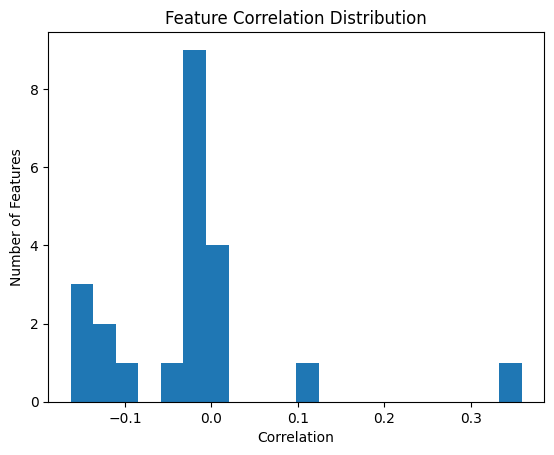

In [89]:
plt.hist(corr_df['correlation'], bins=20)
plt.xlabel('Correlation')
plt.ylabel('Number of Features')
plt.title('Feature Correlation Distribution')
plt.show()

In [90]:
corr_threshold = 0.01
pval_threshold = 0.05

# Select features satisfying thresholds
selected_features_corr = corr_df[
    (corr_df['abs_correlation'] > corr_threshold) &
    (corr_df['p_value'] < pval_threshold)
]['feature'].tolist()

print(f"MEthod A -- > Correlation selected {len(selected_features_corr)} features with correlation > {corr_threshold} and p-value < 0.05")
print(selected_features_corr)

MEthod A -- > Correlation selected 16 features with correlation > 0.01 and p-value < 0.05
['delinquency_count_6m', 'LIMIT_BAL', 'total_payment', 'std_bill_amt', 'avg_repayment_ratio_6m', 'std_pay_amt', 'credit_utilization_ratio', 'repayment_ratio_6', 'total_bill', 'recent_bill_change', 'recent_payment_change', 'Bill_amt1', 'AVG_Bill_amt', 'age', 'Bill_amt3', 'Bill_amt2']


Correlation filter finds linear relationships between features and target; good first-pass filter.

In [ ]:
display(HTML("<hr>"))

Method-2 --> Using Random Forest to get feature importance

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_imputed, y)
importances = pd.Series(rf.feature_importances_, index=features_for_selection)

threshold = importances.median()
rf_selected = importances[importances > threshold].index.tolist()

print(f"Method B --> (Random Forest) selected {len(rf_selected)} features.")
print(rf_selected)

Random forest importance captures nonlinear and interaction effects, shows how much each feature reduces uncertainty.

In [ ]:
display(HTML("<hr>"))

Method-3 ----> Recursive Feature Elimination (RFE) with Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
rfe = RFE(model)

rfe.fit(X_imputed, y)

rfe_selected = [f for f, s in zip(X.columns, rfe.support_) if s]

print(f"Method C --> (RFE with LR) selected {len(rfe_selected)} features.")
print("Selected features by RFE:", rfe_selected)

RFE uses a model to recursively eliminate weakest features and keeps the most predictive subset.

In [ ]:
display(HTML("<hr>"))

In [ ]:
# Summarising

feature_summary = pd.DataFrame({'feature':features_for_selection})
feature_summary['corr_selected'] = feature_summary['feature'].isin(selected_features_corr)
feature_summary['rf_selected'] = feature_summary['feature'].isin(rf_selected)
feature_summary['rfe_selected'] = feature_summary['feature'].isin(rfe_selected)

feature_summary['selected_count'] = feature_summary[['corr_selected', 'rf_selected', 'rfe_selected']].sum(axis=1)

print("\nFeature selection summary:")
print(feature_summary.sort_values(by='selected_count', ascending=False))
print('-'*150)

final_features = feature_summary[feature_summary['selected_count'] >= 2]['feature'].tolist()

print(f"Number of features selected:{len(final_features)}")
print(f"\nFinal selected features (in at least 2 methods): {final_features}")

In [ ]:
feature_summary['selected_count'] = feature_summary[['corr_selected', 'rf_selected', 'rfe_selected']].sum(axis=1)

# Step 3: Plot feature selection counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_summary.sort_values(by='selected_count', ascending=False),
    x='selected_count', y='feature', palette='viridis'
)
plt.title("Number of Methods That Selected Each Feature", fontsize=14)
plt.xlabel("Selection Count")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
display(HTML("<hr>"))

### 2) For categorical variables

We will compute mutual information (MI) between each categorical variable an dtraget variable , to decide feature dependency on target.

In [ ]:
categorical_features = ['sex', 'education', 'marriage']
X_cat = train_df_capped[categorical_features]
y = train_df_capped['next_month_default']
mi_scores = mutual_info_classif(X_cat, y, discrete_features=True, random_state=42)
mi_df = pd.DataFrame({
    'feature': categorical_features,
    'mutual_information': mi_scores})
mi_df = mi_df.sort_values(by='mutual_information', ascending=False).reset_index(drop=True)
mi_df

Since , these MI values are very low and almost close to 0, indicating features are very weakly dependent on the target, I decide to drop them.

In [ ]:
display(HTML("<hr>"))

In [ ]:
display(HTML("<hr>"))

## <u>Train-Test Split <u>

In [ ]:
# Splitting into train test split

x = train_df_capped[final_features]  # your 14 features
y = train_df_capped['next_month_default']

x.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
x.isnull().sum()

In [ ]:
# 2. Impute missing values on train, then transform test with same imputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=final_features, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=final_features, index=X_test.index)

## <u>Scaling<u>

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=final_features, index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=final_features, index=X_test.index)
# Use X_test_scaled, y_test for final evaluation

In [ ]:
# Saving the scaler
joblib.dump(scaler, 'scaler.pkl')

# Later, to load it:
scaler = joblib.load('scaler.pkl')

# Use it like this on new data:
#X_new_scaled = scaler.transform(X_new)

## <u>Handling Class Imbalance<u>

We earlier noticed that 'next_month_default' column is imbalanced (default rate is ~19%) and rest is not default rate.This can lead to baised models.

### Using ADASYN

In [ ]:
# 4. Apply ADASYN to balance training data only (on scaled train data)
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

In [ ]:
# Create a DataFrame with both counts and percentages
class_dist = pd.DataFrame({
    'Count': y_train.value_counts(),
    'Percentage (%)': round(y_train.value_counts(normalize=True) * 100, 2)
})

print("Before Balancing:")
print(class_dist)

In [ ]:
# Create a DataFrame showing both counts and percentages
resampled_dist = pd.DataFrame({
    'Count': y_train_resampled.value_counts(),
    'Percentage (%)': round(y_train_resampled.value_counts(normalize=True) * 100, 2)
})

print("\nAfter Balancing with ADASYN:")
print(resampled_dist)

In [ ]:

# Create a DataFrame combining both distributions
before = y_train.value_counts(normalize=True).rename('Before ADASYN') * 100
after = y_train_resampled.value_counts(normalize=True).rename('After ADASYN') * 100

class_dist_df = pd.concat([before, after], axis=1)
class_dist_df.index = ['No Default (0)', 'Default (1)']

# Plot
class_dist_df.plot(kind='bar', figsize=(5, 4), color=['#8da0cb', '#fc8d62'])
plt.title('Class Distribution Before vs After ADASYN')
plt.ylabel('Percentage (%)')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
display(HTML("<hr>"))

In [ ]:
# old

# Splitting data

#features_to_scale = [f for f in final_features if f != 'Customer_ID']
#X_to_scale = X[features_to_scale]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df_capped[final_features])
if 'Customer_ID' in final_features:
    X_scaled['Customer_ID'] = X['Customer_ID'].values

#X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Not scaling 'CustomerID ' feature , scaling rest all other features.

# Savimg the scaler for validation dataset

joblib.dump(scaler, 'scaler.pkl')

print("Summary statistics of scaled features:")
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df.describe().T[['mean','std','min','max']]

print("Scaler learned means for each feature:")
(dict(zip(final_features, scaler.mean_)))

print("\nScaler learned std deviations for each feature:")
dict(zip(final_features, scaler.scale_))

features_to_check = final_features[1:5]
fig, axes = plt.subplots(len(features_to_check), 2, figsize=(10, 4*len(features_to_check)))

for i, feature in enumerate(features_to_check):
    sns.histplot(train_df[feature], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Original distribution of {feature}')
    
    sns.histplot(X_scaled[feature], ax=axes[i, 1], kde=True, color='salmon')
    axes[i, 1].set_title(f'Scaled distribution of {feature}')

plt.tight_layout()
plt.show()

### Using SMOTE for balancing

In [ ]:
display(HTML("<hr>"))

## <u> Model Training<u>

In [ ]:
# Using balanced and scaled training set (from ADASYN)
X_train_final = X_train_resampled
y_train_final = y_train_resampled         # defining new variables

In [ ]:
# Using scaled testing set (real distribution without ADASYN)
X_test_final = X_test_scaled
y_test_final = y_test

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

In [ ]:
print('/')

In [ ]:
results = []

for model_name, model in models.items():
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    f2 = fbeta_score(y_test_final, y_pred, beta=2)
    roc_auc = roc_auc_score(y_test_final, y_proba)

    results.append({
        "Model": model_name,
        "F2 Score": f2,
        "ROC AUC": roc_auc,
        "Classification Report": classification_report(y_test_final, y_pred),
        "Confusion Matrix": confusion_matrix(y_test_final, y_pred)
    })

In [ ]:
# Convert to DataFrame and sort by F2 score descending
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F2 Score", ascending=False).reset_index(drop=True)

# Print summary
for idx, row in results_df.iterrows():
    print(f"\n--- {row['Model']} ---")
    print(f"F2 Score: {row['F2 Score']:.4f}")
    print(f"ROC AUC: {row['ROC AUC']:.4f}")
    print("Confusion Matrix:")
    print(row['Confusion Matrix'])
    print("Classification Report:")
    print(row['Classification Report'])

In [ ]:
# Create formatted results table with key metrics
summary_data = []

for result in results:
    model_name = result['Model']
    f2_score = round(result['F2 Score'], 4)
    roc_auc = round(result['ROC AUC'], 4)

    # Extract confusion matrix components
    tn, fp, fn, tp = result['Confusion Matrix'].ravel()

    # Optional: Add precision, recall if needed
    summary_data.append({
        'Model': model_name,
        'F2 Score': f2_score,
        'ROC AUC': roc_auc,
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn
    })

# Convert to DataFrame and sort
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by="F2 Score", ascending=False).reset_index(drop=True)

# Display as table
print(" Model Performance Summary:\n")
print(summary_df)

In [ ]:
display(HTML("<hr>"))

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and F2 scores from results
models = [result['Model'] for result in results]
f2_scores = [float(result['F2 Score']) for result in results]  # ensure numeric

# Zip and sort in ascending order of F2 score
sorted_pairs = sorted(zip(f2_scores, models))
sorted_f2_scores, sorted_models = zip(*sorted_pairs)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(sorted_models, sorted_f2_scores, color='skyblue')
plt.title("F2 Score Comparison Across Models")
plt.ylabel("F2 Score")
plt.ylim(0.4, max(sorted_f2_scores) + 0.05)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract metrics from results
models = [result['Model'] for result in results]
f2_scores = [round(result['F2 Score'], 4) for result in results]
roc_aucs = [round(result['ROC AUC'], 4) for result in results]
accuracies = [round(result['Classification Report']['accuracy'], 4) for result in results]
precisions = [round(result['Classification Report']['1']['precision'], 4) for result in results]
recalls = [round(result['Classification Report']['1']['recall'], 4) for result in results]

# Set position of bars on X axis
x = np.arange(len(models))
bar_width = 0.15

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - 2*bar_width, f2_scores, width=bar_width, label='F2 Score')
plt.bar(x - bar_width, roc_aucs, width=bar_width, label='ROC AUC')
plt.bar(x, accuracies, width=bar_width, label='Accuracy')
plt.bar(x + bar_width, precisions, width=bar_width, label='Precision')
plt.bar(x + 2*bar_width, recalls, width=bar_width, label='Recall')

plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison Across Multiple Metrics")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Using LR and SVM as the top 2 models as they generated the highest f2 score among all.

In [ ]:
# After top model seelction

# Impute missing values on train, then transform test with same imputer
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=final_features, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=final_features, index=X_test.index)

# Re-splitting the training set into inner training and validation

X_train_inner, X_val_inner, y_train_inner, y_val_inner = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
# Scaling

scaler_inner = StandardScaler()
X_train_inner_scaled = scaler_inner.fit_transform(X_train_inner)
X_val_inner_scaled = scaler_inner.transform(X_val_inner)

In [ ]:
# Appling ADASYN only on the inner train set

adasyn_inner = ADASYN(random_state=42)
X_resampled_inner, y_resampled_inner = adasyn_inner.fit_resample(X_train_inner_scaled, y_train_inner)

# Check new class balance
from collections import Counter
print(Counter(y_train_inner))         # Original inner
print(Counter(y_resampled_inner))    # Inner after ADASYN

In [ ]:
# Training Logistic Regression and SVM

lr_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr_model.fit(X_resampled_inner, y_resampled_inner)

#svm_model = SVC(probability=True, kernel='rbf', random_state=42)
#svm_model.fit(X_resampled_inner, y_resampled_inner)

# Defining F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Logistic Regression tuning
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
logreg_rs = RandomizedSearchCV(logreg, logreg_params, scoring=f2_scorer, cv=3, n_jobs=-1)
logreg_rs.fit(X_resampled_inner, y_resampled_inner)


# Print best results
print("Best Logistic Regression Parameters:", logreg_rs.best_params_)
print("Best Logistic Regression F2 Score:", logreg_rs.best_score_)


In [ ]:
# Defining
scoring = {
    'F2': make_scorer(fbeta_score, beta=2),
    'Precision': 'precision',
    'Recall': 'recall',
    'ROC_AUC': 'roc_auc'
}

# Logistic Regression tuning
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
logreg_rs = RandomizedSearchCV(logreg, logreg_params, scoring=scoring, refit='F2', cv=5, n_jobs=-1,return_train_score=True)
logreg_rs.fit(X_resampled_inner, y_resampled_inner)


# Print best results
print("Best Logistic Regression Parameters:", logreg_rs.best_params_)
#print("Best Logistic Regression F2 Score:", logreg_rs.best_score_)

cv_results = pd.DataFrame(logreg_rs.cv_results_)
display(cv_results[['params', 'mean_test_F2', 'mean_test_Precision', 'mean_test_Recall', 'mean_test_ROC_AUC']])

In [ ]:
best_lr_model = logreg_rs.best_estimator_

In [ ]:
y_val_proba_lr = best_lr_model.predict_proba(X_val_inner_scaled)[:, 1]


In [ ]:
best_threshold = 0
best_f2 = 0

for threshold in np.arange(0.1, 0.91, 0.01):
    y_val_pred_thresh = (y_val_proba_lr >= threshold).astype(int)
    f2 = fbeta_score(y_val_inner, y_val_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

print(f"Best Threshold for Logistic Regression: {best_threshold:.2f}")
print(f"Best F2 Score at that Threshold: {best_f2:.4f}")

In [ ]:
from sklearn.metrics import fbeta_score, precision_score, recall_score, roc_auc_score

thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0
metrics_at_best_f2 = {}

for thresh in thresholds:
    y_val_pred_thresh = (y_val_proba_lr >= thresh).astype(int)

    f2 = fbeta_score(y_val_inner, y_val_pred_thresh, beta=2)
    precision = precision_score(y_val_inner, y_val_pred_thresh)
    recall = recall_score(y_val_inner, y_val_pred_thresh)
    roc_auc = roc_auc_score(y_val_inner,y_val_pred_thresh )

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = thresh
        metrics_at_best_f2 = {
            "Precision": precision,
            "Recall": recall,
            "F2 Score": f2,
            "ROC AUC": roc_auc
        }

print(f"Best Threshold: {best_threshold:.2f}")
print("Metrics at Best F2 Threshold:")
for metric, value in metrics_at_best_f2.items():
    print(f"{metric}: {value:.4f}")

Recall: 0.8036 , catching 80% of true defalters

F2 Score: 0.5950 , tronger weight on recall, indicating a solid balance for high-risk use cases.

Precision: 0.2919 , 30% of predicted defaulters actually default.

ROC AUC: 0.6727 ,Good discrimination between defaulters and non-defaulters.

In [ ]:
# Assume y_val_final contains true labels and y_proba_lr contains predicted probabilities from Logistic Regression

thresholds = np.arange(0.0, 1.01, 0.01)
precision_list = []
recall_list = []
f2_list = []

for t in thresholds:
    preds = (y_val_proba_lr >= t).astype(int)
    precision_list.append(precision_score(y_val_inner, preds))
    recall_list.append(recall_score(y_val_inner, preds))
    f2_list.append(fbeta_score(y_val_inner, preds, beta=2))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision', linestyle='--', color='orange')
plt.plot(thresholds, recall_list, label='Recall', linestyle='-.', color='green')
plt.plot(thresholds, f2_list, label='F2 Score', linewidth=2, color='blue')
plt.axvline(x=0.41, color='red', linestyle=':', label='Current Best Threshold (0.41)')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F2 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The trade-off curve is smooth around threshold 0.41, meaning your model is robust to small changes

When we evaluated F2 score based on RandomizedSearchCV using (X_resampled_inner, y_resampled_inner) and default threshold as 0.5, we got F2 score as 0.6122, but when we did threhold tuning on seperate valiadtion set (X_val_inner_scaled, y_val), we go 0.5945               
                     This validation set likely reflects real-world variability, which might slightly reduce the F2 performance.

In [ ]:
# So saving the fianl model an threshold(tuned)

final_lr_model = logreg_rs.best_estimator_
best_lr_threshold = 0.41

## <u>Final Model Training<u>

We won't be using X_resampled_inner, y_resampled_inner, as they were used only for final model selection and tuning.

Since we have chosen the best hyperparameters and threshold,we will retrain model on all available training data (i.e., X_train_final).

In [ ]:
# Retrain best Logistic Regression with tuned parameters
final_lr_model = LogisticRegression(C=10, penalty='l1', max_iter=1000, solver='liblinear', random_state=42)
final_lr_model.fit(X_train_final, y_train_final)


In [ ]:
# Predict probabilities
y_proba_lr_final =final_lr_model.predict_proba(X_test_final)[:, 1]

# Apply best threshold
best_lr_threshold = 0.41
y_pred_lr_final = (y_proba_lr_final >= best_lr_threshold).astype(int)

# Evaluate
print("Final Logistic Regression Results:")
print("Model : Logistic Regression")
print()
print("F2 Score:", fbeta_score(y_test_final, y_pred_lr_final, beta=2))
print("ROC AUC:", roc_auc_score(y_test_final, y_proba_lr_final))
print("Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred_lr_final))
print("Classification Report:\n", classification_report(y_test_final, y_pred_lr_final))

In [ ]:
# Saving the model
joblib.dump(final_lr_model, 'logistic_regression_final_model.pkl')

# Saving the scaler
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
# Get feature importance
import pandas as pd
importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': final_lr_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Top important features:\n", importance)


Coefficients indicate the direction and strength of each feature's influence on the likelihood of default:

A positive coefficient increases the likelihood of default.                      
A negative coefficient reduces the likelihood of default.

## SHAP

In [ ]:
# Creating SHAP explainer for logistic regression
explainer = shap.Explainer(final_lr_model, X_train_scaled, feature_names=X_train_final.columns)

In [ ]:
# Computing SHAP values
shap_values = explainer(X_test_final)

# Global feature importance
shap.plots.bar(shap_values, max_display=14)

Delinquency_count_6m is the most influential feature ,indicating that it has the stringest average impact on mdel's prediction whereas features such as rapayment_ratio_6,std_bill_amt,etc have the least average impact.

In [ ]:
# SHAP summary plot (distribution of SHAP values)
shap.plots.beeswarm(shap_values, max_display=14)

In [ ]:

# Local explanation for first instance in test set
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.summary_plot(shap_values, X_test_final)

Positive SHAP value indicates how much a feature pushes prediction to default and negative SHAP value indicates how much to no-default.

In [ ]:
def generate_shap_justification(index, shap_values, X_test_final):
    threshold = 0.0  # Only include strong contributors

    # Get SHAP values and feature values for the sample
    sample_shap = shap_values[index].values
    sample_data = X_test_final.iloc[index]
    base_value = shap_values[index].base_values
    prediction_score = base_value + sum(sample_shap)

    justification = f"Customer #{index} was predicted to "
    justification += "default" if prediction_score > 0 else "not default"
    justification += f" with a score of {prediction_score:.3f}.\n\nKey contributing factors:\n"

    # Get top contributing features
    feature_impact = list(zip(X_test_final.columns, sample_data, sample_shap))
    feature_impact.sort(key=lambda x: abs(x[2]), reverse=True)

    for feature, value, shap_val in feature_impact[:5]:  # Top 5 features
        if abs(shap_val) > threshold:
            direction = "increased" if shap_val > 0 else "decreased"
            justification += f"- {feature} = {value:.2f} → {direction} risk of default\n"

    return justification


In [ ]:
# Running for example the first 3 customers in test set
for i in range(3):
    print(generate_shap_justification(i, shap_values, X_test_final))
    print("—" * 60)


In [ ]:
# Checking

index_1=5032
print(generate_shap_justification(index_1, shap_values, X_test_final))

print("-"*50)

index_2=5038
print(generate_shap_justification(index_2, shap_values, X_test_final))

## Predicting on Validation dataset

In [ ]:
uploaded = files.upload()

In [ ]:
val_df=pd.read_csv('validate_dataset_final.csv')

In [ ]:
val_df.isnull().sum().sum()

In [ ]:
val_df.duplicated().sum()

In [ ]:
# Extracting the list of features used for final model

print(len(final_features))
print(final_features)

In [ ]:
# Feature Engineering of required columns

val_df['total_bill'] = val_df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1)
val_df['std_pay_amt'] = val_df[[f'pay_amt{i}' for i in range(1, 7)]].std(axis=1)
val_df['credit_utilization_ratio'] = val_df['AVG_Bill_amt'] / val_df['LIMIT_BAL']
val_df['total_payment'] = val_df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)
val_df['recent_bill_change'] = val_df['Bill_amt1'] - val_df['Bill_amt6']
val_df['recent_payment_change'] = val_df['pay_amt1'] - val_df['pay_amt6']
val_df['std_bill_amt'] = val_df[[f'Bill_amt{i}' for i in range(1, 7)]].std(axis=1)
val_df['delinquency_count_6m'] = val_df[pay_cols].apply(lambda row: (row >= 1).astype(int).sum(), axis=1)
val_df['repayment_ratio_6'] = val_df['pay_amt1'] / (val_df['Bill_amt6'] + 1)
val_df['avg_repayment_ratio_6m'] = val_df[repayment_cols].sum(axis=1) / (val_df[bill_cols].sum(axis=1) + 1)


In [ ]:
# Applying Yeo-Johnson transformation

cols_to_transform = ['AVG_Bill_amt', 'total_bill', 'std_pay_amt', 'credit_utilization_ratio',
                     'LIMIT_BAL', 'total_payment', 'recent_bill_change','recent_payment_change', 'std_bill_amt',
                     'delinquency_count_6m', 'repayment_ratio_6', 'avg_repayment_ratio_6m']

pt = PowerTransformer(method='yeo-johnson')

val_df[cols_to_transform] = pt.fit_transform(val_df[cols_to_transform])

# Checking skewness after transform


print(val_df[cols_to_transform].skew())


In [ ]:
X_val=val_df[['AVG_Bill_amt', 'total_bill', 'std_pay_amt', 'credit_utilization_ratio', 'LIMIT_BAL', 'total_payment', 'recent_bill_change', 'age', 'recent_payment_change', 'std_bill_amt', 'delinquency_count_6m', 'repayment_ratio_6', 'avg_repayment_ratio_6m', 'Bill_amt1']]

In [ ]:
X_val_scaled=scaler.transform(X_val)
val_probs = final_lr_model.predict_proba(X_val_scaled)[:, 1]
val_preds = (val_probs >= 0.44).astype(int)

In [ ]:
# Creating output dataframe

output_df = val_df[['Customer_ID']].copy()
output_df['next_month_default( 0 or 1 )'] = val_preds
output_df.to_csv('submission_23119032.csv', index=False)

In [ ]:
output_df['default_prediction'].value_counts()

In [ ]:
output_df.head()

In [ ]:
explainer_val = shap.Explainer(final_lr_model, X_val_scaled, feature_names=X_val.columns)
shap_values_val = explainer(X_val_scaled)

In [ ]:
# Create a mapping from customer_id to index
id_to_index = val_df.reset_index(drop=True).set_index('Customer_ID').index.to_series()


In [ ]:
def generate_shap_justification_by_id(customer_id, shap_values_val, X_val_scaled, val_df):
    # Map customer ID to correct row index
    try:
        index = val_df.reset_index(drop=True).index[val_df['Customer_ID'] == customer_id].tolist()[0]
    except IndexError:
        return f"Customer ID {customer_id} not found in validation set."

    threshold = 0.0
    sample_shap = shap_values_val[index].values
    sample_data = X_val.iloc[index]
    base_value = shap_values_val[index].base_values
    prediction_score = base_value + sum(sample_shap)

    justification = f"Customer ID {customer_id} was predicted to "
    justification += "default" if prediction_score > 0 else "not default"
    justification += f" with a score of {prediction_score:.3f}.\n\nKey contributing factors:\n"

    feature_impact = list(zip(X_val.columns, sample_data, sample_shap))
    feature_impact.sort(key=lambda x: abs(x[2]), reverse=True)

    for feature, value, shap_val in feature_impact[:5]:
        if abs(shap_val) > threshold:
            direction = "increased" if shap_val > 0 else "decreased"
            justification += f"- {feature} = {value:.2f} → {direction} risk of default\n"

    return justification


In [ ]:
print(generate_shap_justification_by_id(4, shap_values_val, X_val_scaled, val_df))


In [ ]:
from google.colab import files
files.download('validation_predictions.csv')

In [ ]:
# Parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize model
gb_model = GradientBoostingClassifier(random_state=42)

# Randomized search with 5-fold CV
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=30,
    scoring=f2_scorer,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit to resampled training data
random_search_gb.fit(X_resampled_inner, y_resampled_inner)

# Best model after tuning
best_gb_model = random_search_gb.best_estimator_

print("Best GB hyperparameters:", random_search_gb.best_params_)
print("Best Graident Boosting F2 Score:", random_search_gb.best_score_)


# SVM tuning
svm = SVC(probability=True, random_state=42)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_cv = RandomizedSearchCV(svm, svm_params, scoring=f2_scorer, cv=3, n_jobs=-1)
svm_cv.fit(X_resampled_inner, y_resampled_inner)


print("Best SVM Parameters:", svm_cv.best_params_)
print("Best SVM F2 Score:", svm_cv.best_score_)


In [ ]:
# Threshold Tuning

def tune_threshold(model, X_valid, y_valid, beta=2):
    y_proba = model.predict_proba(X_valid)[:, 1]
    thresholds = np.arange(0.1, 0.91, 0.01)
    best_thresh = 0.5
    best_f2 = 0

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        f2 = fbeta_score(y_valid, y_pred, beta=beta)
        if f2 > best_f2:
            best_f2 = f2
            best_thresh = t

    return best_thresh, best_f2

# Use best estimators from GridSearch
best_logreg = logreg_cv.best_estimator_
best_svm = svm_cv.best_estimator_

# Threshold tuning
best_thresh_lr, best_f2_lr = tune_threshold(best_logreg, X_val_inner_scaled, y_val_inner)
best_thresh_svm, best_f2_svm = tune_threshold(best_svm, X_val_inner_scaled, y_val_inner)

print(f"Logistic Regression best threshold: {best_thresh_lr}, F2: {best_f2_lr:.4f}")
print(f"SVM best threshold: {best_thresh_svm}, F2: {best_f2_svm:.4f}")


In [ ]:
def find_best_threshold(y_true, y_proba, beta=2.0):
    thresholds = np.arange(0.1, 0.91, 0.01)
    best_threshold = 0.5
    best_f2 = 0

    for thresh in thresholds:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        f2 = fbeta_score(y_true, y_pred_thresh, beta=beta)
        if f2 > best_f2:
            best_f2 = f2
            best_threshold = thresh

    return best_threshold, best_f2

In [ ]:
# Predict probabilities
lr_val_proba = lr_model.predict_proba(X_val_inner_scaled)[:, 1]
svm_val_proba = svm_model.predict_proba(X_val_inner_scaled)[:, 1]

# Tune thresholds
lr_best_thresh, lr_best_f2 = find_best_threshold(y_val_inner, lr_val_proba)
svm_best_thresh, svm_best_f2 = find_best_threshold(y_val_inner, svm_val_proba)

print(f"Logistic Regression best F2: {lr_best_f2:.4f} at threshold {lr_best_thresh:.2f}")
print(f"SVM best F2: {svm_best_f2:.4f} at threshold {svm_best_thresh:.2f}")

In [ ]:
#old